In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 檢查 training data、testing data 是否有遺漏值，觀察資料分佈

In [4]:
# Age, Cabin, Embarked 有遺漏值
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Age, Cabin 有遺漏值
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 為了避免 overfitting，先選定兩個直覺上會影響存活率的 features，分別為艙等、性別，兩者皆無遺漏值，訓練一個 basic model

### 船艙分三個等級，高到低為: 1 -> 3，越高級的船艙存活率越高

<AxesSubplot:xlabel='Pclass', ylabel='count'>

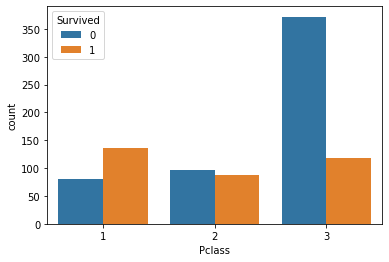

In [8]:
sns.countplot(x="Pclass",hue="Survived", data=df_train)

### 男性死亡數遠遠大於女性，直覺來說應該是讓女性先逃難

<AxesSubplot:xlabel='Sex', ylabel='count'>

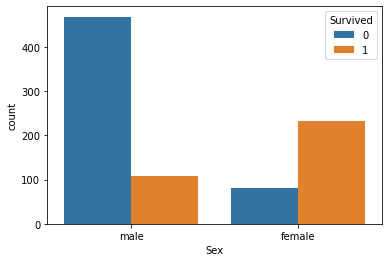

In [9]:
sns.countplot(x="Sex",hue="Survived", data=df_train)

### 對 Sex 做 One-Hot Encoding，male = 1, female = 0

In [10]:
catego_le = LabelEncoder()
df_train["Sex"] = catego_le.fit_transform(df_train["Sex"].values)
df_test["Sex"] = catego_le.fit_transform(df_test["Sex"].values)

In [11]:
df_train["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

### 把 training data 按照 8 : 2 的比例切成 training set、validation set

In [12]:
X = df_train[["Sex", "Pclass"]].values   # features
y = df_train["Survived"].values   # labels
 
# dividing X, y into train and valid data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state = 0)

### Random Forest：Validation Accuracy = 0.788

In [13]:
basic_forest = RandomForestClassifier(n_estimators=300,   # number of decision trees
                                      min_samples_split=20,
                                      n_jobs=2,   # number of cores for parallelism
                                      random_state=2)   # seed used by the random number generator

basic_forest.fit(X_train, y_train)

y_pred = basic_forest.predict(X_valid)
print('Accuracy (basic forest): %.3f' % accuracy_score(y_valid, y_pred))

Accuracy (basic forest): 0.788


In [14]:
# predict on test.csv
test_pred = basic_forest.predict(df_test[["Sex", "Pclass"]].values)

df_basic = df_test[["PassengerId"]]
df_basic["Survived"] = test_pred

/var/folders/ph/x56w7q7x74x8ln5jfql_nc9m0000gn/T/ipykernel_81806/1228037197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic["Survived"] = test_pred


### basic model 在 Kaggle 上測試 score = 0.76555

In [15]:
# 輸出 csv
df_basic.to_csv('basic_forest.csv', index=False)

## 探討其他變數：年齡約有 15% 的遺漏值

### 把年齡和前兩個變數放在一起討論，發現年齡遺漏值大部分來自 3 等船艙，男性遺漏值的佔比約比女性高 5%

/Users/shihyi-yang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shihyi-yang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Sex,0,1,All
Age_exist,,,
0,53,124,177
1,261,453,714
All,314,577,891


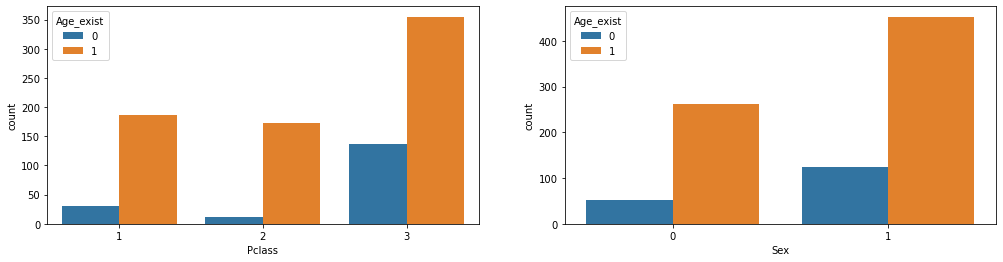

In [16]:
is_null = df_train['Age'].isnull().values
Age_exist = [0 if item == True else 1 for item in is_null]   # is null = 0
df_train['Age_exist'] = Age_exist

fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_figwidth(17)
ax1 = sns.countplot(df_train['Pclass'], hue=df_train['Age_exist'], ax=ax1)
ax2 = sns.countplot(df_train['Sex'], hue=df_train['Age_exist'], ax=ax2)
pd.crosstab(df_train['Age_exist'], df_train['Sex'], margins=True).round(3)

In [17]:
df_train.drop("Age_exist", axis=1, inplace=True)

### 若要觀察年齡與存活之間的關係，要先排除船艙 3，以免因遺漏值過多而失真

In [18]:
df = df_train[["Age", "Survived", "Pclass"]]
df = df[df["Pclass"] != 3].drop(columns="Pclass")

### 在 17 歲以前，存活的人數明顯高於死亡人數，有可能是因為會先救小孩，因此我以 17 歲當分界點，創造一個二元變數，可能會比直接使用真實年齡更適合

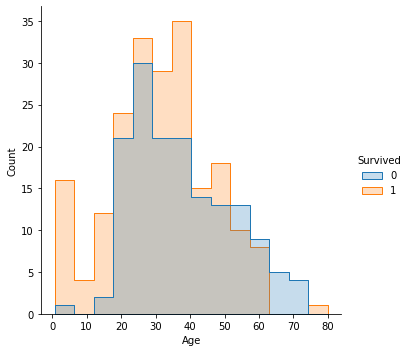

In [19]:
sns.displot(df, x="Age", hue="Survived", element="step")

## 年齡的遺漏值約 15%，若直接使用中位數補值可能會影響預測結果，又因年齡與 Name 中稱謂 (Title) 有一定程度的關聯，我決定借助稱謂進行補值

### 把 Name 中的 Title 都取出

In [20]:
name_values = df_train['Name'].values
Title = [item.split(", ")[1] for item in name_values]
Title = [item.split(". ")[0] for item in Title]

In [21]:
df_train['Title'] = Title
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

### 把 Title 做分類，分為先生 (Mr)，罕見稱謂 (Rare)，小男孩 (Master)，小姐 (Miss)， 女士 (Mrs)

In [22]:
df_train['Title'] = df_train.Title.replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt',
                                             'the Countess', 'Jonkheer', 'Dona'], 'Rare')
df_train['Title'] = df_train.Title.replace(['Ms', 'Mlle'], 'Miss')
df_train['Title'] = df_train.Title.replace('Mme', 'Mrs')
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

### 若 Age 為遺漏值，則按照每個 Title 年齡中位數進行補值

In [23]:
Age_Median = df_train[['Title','Age']].groupby('Title').median()
Age_Median_dict = {"Master":3.5, "Miss":21.0, "Mr":30.0, "Mrs":35, "Rare":48.5}

In [24]:
Age = df_train['Age'].isnull().values
all_Age = [df_train['Age'][i] if Age[i] == False else Age_Median_dict[df_train['Title'][i]] 
           for i in range(0, len(Age))]

df_train["all_Age"] = all_Age

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  all_Age      891 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


### Age_17 為二元變數，大於 17 歲設為 1，反之設為 0

In [26]:
Age_17_train = [0 if item < 17 else 1 for item in df_train['all_Age'].values]

df_train['Age_17'] = Age_17_train

In [27]:
df_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,all_Age,Age_17
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,35.0,1
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,Mr,30.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,54.0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,2.0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,27.0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,14.0,0


### 把 training data 按照 8 : 2 的比例切成 training set、validation set

In [28]:
X = df_train[["Sex", "Pclass", "Age_17"]].values   # features
y = df_train["Survived"].values   # labels
 
# dividing X, y into train and valid data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state = 0)

### Random Forest：Validation Accuracy = 0.793，進步了大約 0.01

In [29]:
forest = RandomForestClassifier(n_estimators=300,   # number of decision trees
                                min_samples_split=20,
                                n_jobs=2,   # number of cores for parallelism
                                random_state=2)   # seed used by the random number generator

forest.fit(X_train, y_train)

y_pred = forest.predict(X_valid)
print('Accuracy (forest): %.3f' % accuracy_score(y_valid, y_pred))

Accuracy (forest): 0.793


### 對 testing data 補值，與前面步驟相同

In [30]:
name_values = df_test['Name'].values
Title = [item.split(", ")[1] for item in name_values]
Title = [item.split(". ")[0] for item in Title]
df_test['Title'] = Title

df_test['Title'] = df_test.Title.replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt',
                                             'the Countess', 'Jonkheer', 'Dona'], 'Rare')
df_test['Title'] = df_test.Title.replace(['Ms', 'Mlle'], 'Miss')
df_test['Title'] = df_test.Title.replace('Mme', 'Mrs')

Age_Median_dict = {"Master":3.5, "Miss":21.0, "Mr":30.0, "Mrs":35, "Rare":48.5}

Age = df_test['Age'].isnull().values
all_Age = [df_test['Age'][i] if Age[i] == False else Age_Median_dict[df_test['Title'][i]] 
           for i in range(0, len(Age))]
df_test["all_Age"] = all_Age

Age_17_test = [0 if item < 17 else 1 for item in df_test['all_Age'].values]
df_test['Age_17'] = Age_17_test

In [31]:
df_test.head(30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,all_Age,Age_17
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,Mr,34.5,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,Mrs,47.0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,Mr,62.0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,Mr,27.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,Mrs,22.0,1
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S,Mr,14.0,0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q,Miss,30.0,1
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S,Mr,26.0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C,Mrs,18.0,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr,21.0,1


In [32]:
# predict on test.csv
test_pred = forest.predict(df_test[["Sex", "Pclass", "Age_17"]].values)
df_forest = df_test[["PassengerId"]]
df_forest["Survived"] = test_pred

/var/folders/ph/x56w7q7x74x8ln5jfql_nc9m0000gn/T/ipykernel_81806/2266970330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forest["Survived"] = test_pred


### 在 Kaggle 上測試 score = 0.77272，進步了 0.01

In [33]:
# 輸出 csv
df_forest.to_csv('forest.csv', index=False)

## 處理 Fare feature

### 只有一個遺漏值，直接以中位數進行補值

In [34]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
 12  all_Age      418 non-null    float64
 13  Age_17       418 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 45.8+ KB


### 因票價分配過於右偏，對其取 log，讓票價服從常態分佈，易於觀察

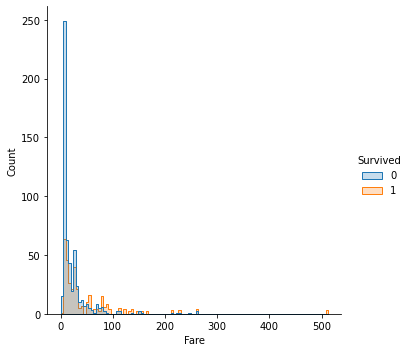

In [35]:
df = df_train[["Fare", "Survived"]]
sns.displot(df, x="Fare", hue="Survived", element="step")

### 從 log(Fare) 的分配可以看出，較低的票價確實有較高的死亡率

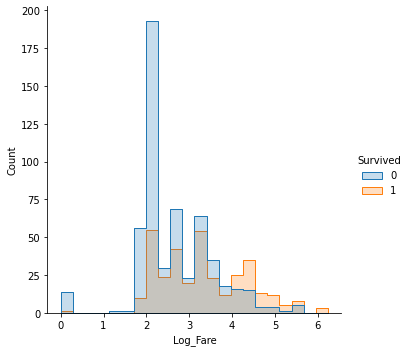

In [36]:
Log_Fare = df_train['Fare'].values
df_train['Log_Fare'] = [np.log(item) if item > 1 else 0 for item in Log_Fare]

df = df_train[["Log_Fare", "Survived"]]
sns.displot(df, x="Log_Fare", hue="Survived", element="step")

### 從盒鬚圖更可以明顯看出，存活下來的乘客確實平均而言付出較高的票價，故放入票價這個變數

Fare           
Survived          0          1
Pclass                        
1         64.684007  95.608029
2         19.412328  22.055700
3         13.669364  13.694887

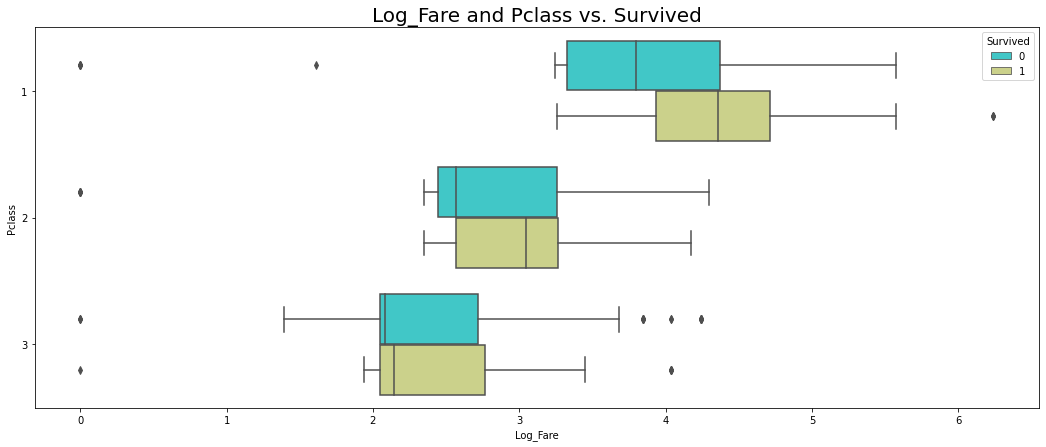

In [37]:
fig, ax = plt.subplots(figsize = (18,7))

sns.boxplot(y='Pclass', x='Log_Fare', hue='Survived', data=df_train, orient='h'
                ,ax=ax, palette='rainbow')
ax.set_title('Log_Fare and Pclass vs. Survived', fontsize = 20)
pd.pivot_table(df_train, values = ['Fare'], index = ['Pclass'], columns= ['Survived'])

In [38]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,all_Age,Age_17,Log_Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,22.0,1,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,38.0,1,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,26.0,1,2.070022
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0,1,3.972177
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,35.0,1,2.085672
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,Mr,30.0,1,2.135148
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,54.0,1,3.948596
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,2.0,0,3.048088
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,27.0,1,2.409941
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,14.0,0,3.403555


### 把 training data 按照 8 : 2 的比例切成 training set、validation set

In [39]:
X = df_train[["Sex", "Pclass", "Age_17", "Log_Fare"]].values   # features
y = df_train["Survived"].values   # labels
 
# dividing X, y into train and valid data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state = 0)

### Random Forest：Validation Accuracy = 0.832，進步了大約 0.04

In [40]:
forest2 = RandomForestClassifier(n_estimators=300,   # number of decision trees
                                 min_samples_split=20,
                                 n_jobs=2,   # number of cores for parallelism
                                 random_state=2)   # seed used by the random number generator

forest2.fit(X_train, y_train)

y_pred = forest2.predict(X_valid)
print('Accuracy (forest2): %.3f' % accuracy_score(y_valid, y_pred))

Accuracy (forest2): 0.832


### 對 testing data Fare feature 做處理

In [41]:
Log_Fare = df_test['Fare'].values
df_test['Log_Fare'] = [np.log(item) if item > 1 else 0 for item in Log_Fare]

### 加入 Log(Fare) 為目前為止訓練出最好的 model，因此把 validation set 跟 training set 結合，再訓練一次模型

In [42]:
forest3 = RandomForestClassifier(n_estimators=300,   # number of decision trees
                                 min_samples_split=20,
                                 n_jobs=2,   # number of cores for parallelism
                                 random_state=2)   # seed used by the random number generator

forest3.fit(X, y)

# predict on test.csv
test_pred = forest3.predict(df_test[["Sex", "Pclass", "Age_17", "Log_Fare"]].values)
df_forest3 = df_test[["PassengerId"]]
df_forest3["Survived"] = test_pred

/var/folders/ph/x56w7q7x74x8ln5jfql_nc9m0000gn/T/ipykernel_81806/2365894281.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forest3["Survived"] = test_pred


## 在 Kaggle 上測試 score = 0.78，進步了 0.01

In [43]:
# 輸出 csv
df_forest3.to_csv('forest3.csv', index=False)

### 最後使用 Grid Search 對 Hyperparameters 進行調整

In [44]:
param_min_samples_split = [14, 16, 18, 20, 22]
param_n_estimators = [300, 400, 500]

forest_grid = RandomForestClassifier(random_state=2, n_jobs=2)

param_grid = [{'min_samples_split':param_min_samples_split,
               'n_estimators':param_n_estimators}]

gs = GridSearchCV(estimator=forest_grid,
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.8238277572029377
{'min_samples_split': 14, 'n_estimators': 400}


### 根據 Grid Search 的結果，調整 Hyperparameters

In [45]:
forest4 = RandomForestClassifier(n_estimators=400,   # number of decision trees
                                 min_samples_split=14,
                                 n_jobs=2,   # number of cores for parallelism
                                 random_state=2)   # seed used by the random number generator

forest4.fit(X, y)

# predict on test.csv
test_pred = forest4.predict(df_test[["Sex", "Pclass", "Age_17", "Log_Fare"]].values)
df_forest4 = df_test[["PassengerId"]]
df_forest4["Survived"] = test_pred

/var/folders/ph/x56w7q7x74x8ln5jfql_nc9m0000gn/T/ipykernel_81806/1860837329.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forest4["Survived"] = test_pred


### 在 Kaggle 上測試 score = 0.783，進步了 0.003

In [46]:
df_forest4.to_csv('forest4.csv', index=False)

## Features Importance：票價和性別在模型中的重要性非常高

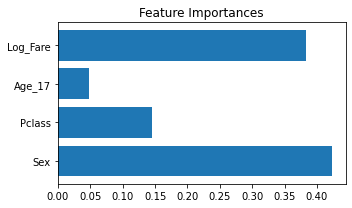

In [47]:
column_name = ["Sex", "Pclass", "Age_17", "Log_Fare"]

plt.figure(figsize=(5, 3))
plt.title('Feature Importances')
plt.barh(column_name, forest4.feature_importances_)
plt.tight_layout()
plt.savefig('forest-feature-importances.png', dpi=300)
plt.show()